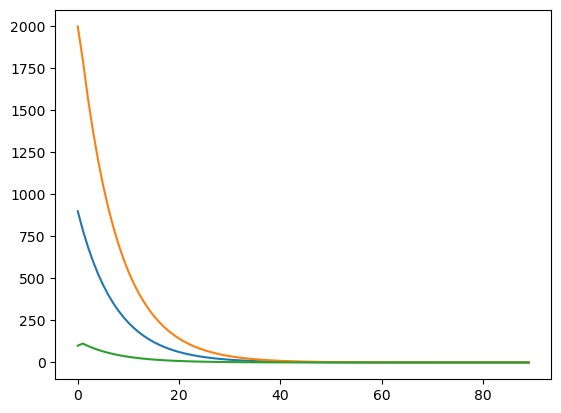

In [46]:
from turtle import shape
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad_f(x):
    return 2*x

def GD(f, grad_f, x0, errf, errx, kmax):
    k = 1

    errorsf = np.zeros(kmax)
    errorsx = np.zeros(kmax)
    computed_x = np.zeros(kmax)
    grad = grad_f(x0)
    alpha = 0.05
    x_old = x0
    x = x_old - (alpha * grad)
    while k < kmax and np.linalg.norm(grad) > errf and errx < np.linalg.norm(x-x_old):
        errorsf[k-1] = np.linalg.norm(grad)
        errorsx[k-1] = np.linalg.norm(x-x_old)
        computed_x[k-1] = x
        k = k + 1
        x_old = x
        grad = grad_f(x_old)
        alpha = backtracking(f, grad_f, np.array([x_old]))
        x = x_old - (alpha * grad)
    return x, errorsf[:k], errorsx[:k], computed_x[:k], k

x0 = 1000
errf = 1e-3
errx = 1e-3
kmax = 100

x, errorsf, errorsx, computed_x, k = GD(f, grad_f, x0, errf, errx, kmax)

plt.plot(np.arange(k), computed_x)
plt.plot(np.arange(k), errorsf)
plt.plot(np.arange(k), errorsx)



def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

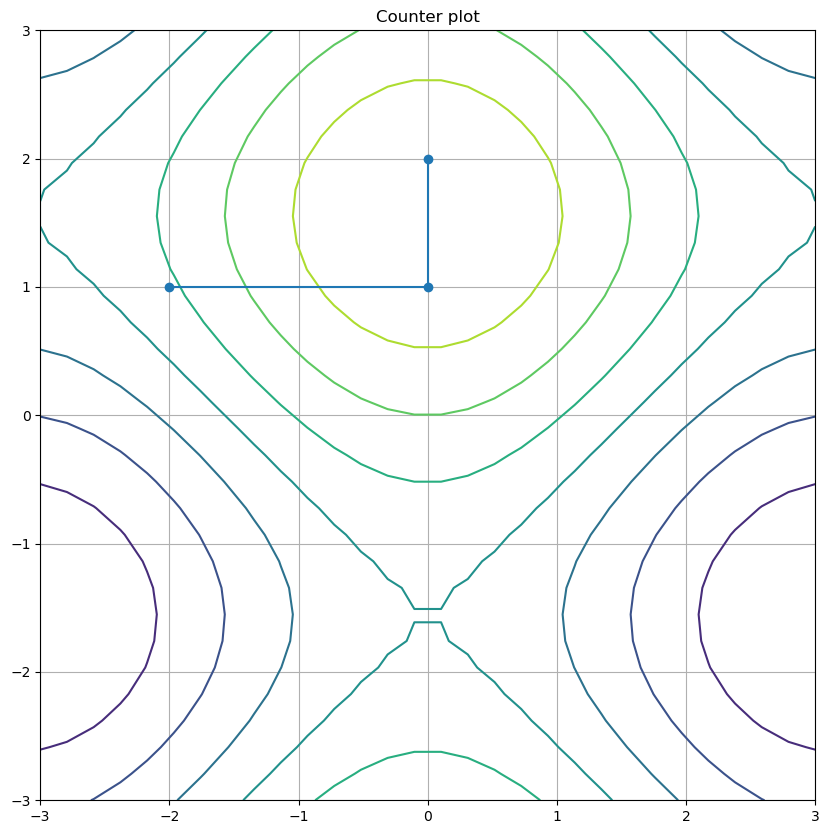

In [56]:
def f(x, y):
    return np.cos(x) + np.sin(y)

xv = np.linspace(-3, 3, 30)
yv = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(xv, yv)

x = np.array([[-2, 1], [0,1], [0,2]])
zz = f(xx, yy)

plt.figure(figsize=(10,10))
plt.contour(xx, yy, zz)
plt.plot(x[:, 0], x[:, 1], 'o-')
plt.title("Counter plot")
plt.grid()
plt.show()

# SGD

In [58]:
def l(w, D):
    # Loss function over D
    pass

def SGD(l, grad_l, w0, D, batch_size, n_epochs, tolf, tolx, kmax):

    alpha = 1

    # D = (X, Y) where X is d x N
    #                  Y is N

    X, Y = D 
    d, N = X.shape

    n_batch_per_epoch = N / batch_size

    f_val = np.zeros((kmax+1, ))
    err_val = np.zeros((kmax+1, ))
    k = 0
    conditions = ...
    for epoch in range(n_epochs):
        for k in range(n_batch_per_epoch):

            # Sample M from D
            # Mx has shape d x batch_size
            # My has shape batch_size 
            M = (Mx, My)

            X = ...
            Y = ...

            # Update alpha
            alpha = 1

            # Update x
            w = w0 - ...

            # Restart
            w0 = w

            # Update k
            k = k+1
        # Reload X, Y
        X = X_backup
        Y = Y_backup

        # ATTENTION: you have to shuffle again (differently)
    return w

# Remember: In SGD, w0 should be chosen randomly (sample for Gaussian)
# Upgrade: modify the code above to return f_val (over M)
# f_val[k] = l(w_k, M)


# Regression